In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
import scipy.stats as stats
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [56]:
%cd "C:\Users\ARYAN SHARMA\NTCC\NETFLIX SURVEY"


C:\Users\ARYAN SHARMA\NTCC\NETFLIX SURVEY


In [57]:
data=pd.read_csv("NETFLIX SURVEY cleaned.csv")

In [58]:
data.head()

,Timestamp,Name,Age,Gender,Profession,Moviepre,Availability,Weekuse,watchepisode,Total,Otherstream,Nos,NextEpisodeChance,SuggestionSatisfaction,EntertainmentSat,Paid
0,2020/05/12 12:55:29 PM GMT+5:30,Pratik,25-34,Male,I have a job or businees,1,1,6,3,20,1,2.0,4,3,4,1
1,2020/05/12 1:13:12 PM GMT+5:30,Nischay Gautam,15-24,Male,I am a college student,1,1,2,2,15,1,2.0,5,5,3,1
2,2020/05/12 1:16:36 PM GMT+5:30,Mishu Singh,15-24,Female,I am a college student,2,1,1,5,20,1,3.0,4,4,5,1
3,2020/05/12 1:17:10 PM GMT+5:30,Esha Sinha,15-24,Female,I am a college student,2,1,1,2,5,1,1.0,2,2,3,0
4,2020/05/12 1:17:47 PM GMT+5:30,Pawan Agarwal,25-34,Male,I have a job or businees,1,0,1,4,5,1,1.0,3,3,3,1


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               171 non-null    object 
 1   Name                    171 non-null    object 
 2   Age                     171 non-null    object 
 3    Gender                 171 non-null    object 
 4   Profession              171 non-null    object 
 5   Moviepre                171 non-null    int64  
 6   Availability            171 non-null    int64  
 7   Weekuse                 171 non-null    int64  
 8   watchepisode            171 non-null    int64  
 9   Total                   171 non-null    int64  
 10  Otherstream             171 non-null    int64  
 11  Nos                     168 non-null    float64
 12  NextEpisodeChance       171 non-null    int64  
 13  SuggestionSatisfaction  171 non-null    int64  
 14  EntertainmentSat        171 non-null    in

In [60]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [61]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [62]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [63]:
pandas_profiling.ProfileReport(data)

In [64]:
data = data.apply(lambda x: missing_imputation(x))

In [65]:
numeric_var_names = [key for key in dict(data.dtypes) 
                     if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [66]:
print(numeric_var_names)
print(cat_var_names)

['Moviepre', 'Availability', 'Weekuse', 'watchepisode', 'Total', 'Otherstream', 'Nos', 'NextEpisodeChance', 'SuggestionSatisfaction', 'EntertainmentSat', 'Paid']
['Timestamp', 'Name', 'Age', ' Gender', 'Profession']


In [67]:
data_num = data[numeric_var_names]

In [68]:
num_summary = data_num.apply(continuous_var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Moviepre,171.0,0.0,300.000000,1.754386,2.0,0.572323,0.327554,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0
Availability,171.0,0.0,129.000000,0.754386,1.0,0.431715,0.186378,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weekuse,171.0,0.0,603.000000,3.526316,3.0,1.879661,3.533127,1.0,1.0,1.0,1.0,2.0,3.0,6.0,6.0,6.0,6.0,6.0
watchepisode,171.0,0.0,537.000000,3.140351,3.0,1.351756,1.827245,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0
Total,171.0,0.0,7741.000000,45.269006,25.0,96.893016,9388.256622,0.0,2.0,5.0,8.0,15.0,25.0,50.0,72.0,100.0,416.1,999.0
Otherstream,171.0,0.0,140.000000,0.818713,1.0,0.386387,0.149295,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Nos,171.0,0.0,351.160714,2.053571,2.0,1.947121,3.791282,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.3,20.0
NextEpisodeChance,171.0,0.0,631.000000,3.690058,4.0,1.179664,1.391606,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0
SuggestionSatisfaction,171.0,0.0,646.000000,3.777778,4.0,0.962703,0.926797,1.0,1.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0
EntertainmentSat,171.0,0.0,684.000000,4.000000,4.0,1.100802,1.211765,1.0,1.0,2.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0


In [69]:
corr_matrix = data_num.corr()
corr_matrix.to_csv('corr.csv')

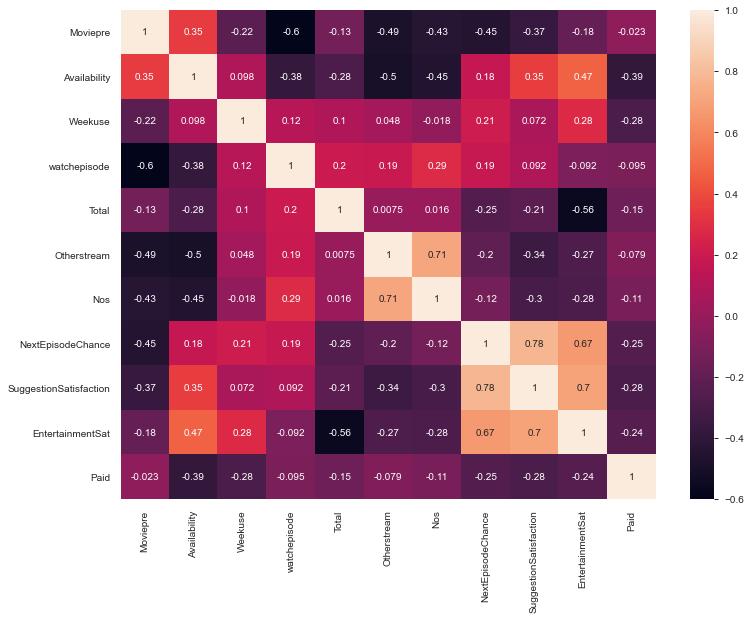

In [70]:
plt.figure(figsize = (12, 9))
sns.heatmap(corr_matrix.corr(), annot=True)

In [71]:
X = data_num[['Moviepre', 'Availability', 'Weekuse', 'watchepisode', 'Total', 'Otherstream', 'Nos', 'NextEpisodeChance', 'SuggestionSatisfaction', 'EntertainmentSat']]

Y = data_num['Paid']

In [72]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [73]:
#from imblearn.over_sampling import SMOTE

#oversampling = SMOTE()
#oversampling

In [74]:
#x,y = oversampling.fit_resample(X,Y)

In [75]:
#x

In [76]:
#y.value_counts()

In [77]:
import statsmodels.formula.api as sm

In [78]:
from imblearn.combine import SMOTETomek   

und_ovr = SMOTETomek(random_state=500)
X_und_ovr_train, y_und_ovr_train = und_ovr.fit_sample(X,Y)

In [79]:
y_und_ovr_train.value_counts()

1    159
0    159
Name: Paid, dtype: int64

In [80]:
X_und_ovr_train

,Moviepre,Availability,Weekuse,watchepisode,Total,Otherstream,Nos,NextEpisodeChance,SuggestionSatisfaction,EntertainmentSat
0,1,1,6,3,20,1,2.000000,4,3,4
1,1,1,2,2,15,1,2.000000,5,5,3
2,2,1,1,5,20,1,3.000000,4,4,5
3,2,1,1,2,5,1,1.000000,2,2,3
4,1,0,1,4,5,1,1.000000,3,3,3
...,...,...,...,...,...,...,...,...,...,...
313,1,1,5,3,10,1,2.000000,4,4,5
314,1,1,1,2,6,1,1.388955,2,2,3
315,1,0,1,4,18,0,2.627337,3,3,2
316,2,1,5,1,26,0,1.758526,2,4,4


In [81]:
baldata=pd.concat([X_und_ovr_train, y_und_ovr_train], axis='columns') 

In [84]:
baldata

,Moviepre,Availability,Weekuse,watchepisode,Total,Otherstream,Nos,NextEpisodeChance,SuggestionSatisfaction,EntertainmentSat,Paid
0,1,1,6,3,20,1,2.000000,4,3,4,1
1,1,1,2,2,15,1,2.000000,5,5,3,1
2,2,1,1,5,20,1,3.000000,4,4,5,1
3,2,1,1,2,5,1,1.000000,2,2,3,0
4,1,0,1,4,5,1,1.000000,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
313,1,1,5,3,10,1,2.000000,4,4,5,0
314,1,1,1,2,6,1,1.388955,2,2,3,0
315,1,0,1,4,18,0,2.627337,3,3,2,0
316,2,1,5,1,26,0,1.758526,2,4,4,0


In [85]:
import statsmodels.formula.api as sm
    

In [86]:
train,test=train_test_split(baldata, test_size = 0.3 ,random_state= 42)

In [87]:
train.columns

Index(['Moviepre', 'Availability', 'Weekuse', 'watchepisode', 'Total',
       'Otherstream', 'Nos', 'NextEpisodeChance', 'SuggestionSatisfaction',
       'EntertainmentSat', 'Paid'],
      dtype='object')

In [88]:
# 'Paid ~ Moviepre + Availability + Weekuse + watchepisode + Total + Otherstream + Nos + NextEpisodeChance + SuggestionSatisfaction + EntertainmentSat'

In [89]:
m1=sm.logit(formula=' Paid ~ Moviepre + Availability + Weekuse + watchepisode + Total + Otherstream + Nos + NextEpisodeChance + SuggestionSatisfaction + EntertainmentSat' ,
                     data= train).fit()

Optimization terminated successfully.
         Current function value: 0.362990
         Iterations 8


In [90]:
print(m1.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.476     
Dependent Variable:    Paid               AIC:                183.1675  
Date:                  2020-06-23 04:24   BIC:                220.5969  
No. Observations:      222                Log-Likelihood:     -80.584   
Df Model:              10                 LL-Null:            -153.80   
Df Residuals:          211                LLR p-value:        2.0223e-26
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept              -12.1574   1.7850 -6.8107 0.0000 -15.6560 -8.6588
Moviepre                 3.7803   0.5933  6.3716 0.0000   2.6175  4.9432
Availab

In [129]:
m2=sm.logit(formula=' Paid ~ Moviepre + Availability + watchepisode + Total + Otherstream + Nos + NextEpisodeChance + SuggestionSatisfaction + EntertainmentSat' ,
                     data= train).fit()

Optimization terminated successfully.
         Current function value: 0.362996
         Iterations 8


In [130]:
print(m2.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.476     
Dependent Variable:    Paid               AIC:                181.1701  
Date:                  2020-06-23 05:13   BIC:                215.1969  
No. Observations:      222                Log-Likelihood:     -80.585   
Df Model:              9                  LL-Null:            -153.80   
Df Residuals:          212                LLR p-value:        4.8482e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept              -12.1701   1.7680 -6.8835 0.0000 -15.6353 -8.7048
Moviepre                 3.7818   0.5926  6.3821 0.0000   2.6204  4.9431
Availab

In [100]:
# empty dataframe
somersd_df = pd.DataFrame()

# iterate for each of the X - dependant variables and get the Somer's D value
for num_variable in baldata.columns.difference(['Paid']):
    
    # execute teh logit model
    logreg = sm.logit(formula = str('Paid ~ ') + str(num_variable), data = baldata).fit()
    
    # get the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # name the column of the df as score
    y_score.columns = ['Score']
    
    # calculate the Somer's D values
    somers_d = 2 * metrics.roc_auc_score(baldata['Paid'], y_score) - 1
    
    # place the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # append the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.690707
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634708
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569869
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647058
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675341
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656903
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663793
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658015
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660712
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.633181
  

In [101]:
somersd_df.sort_values(by = 'SomersD', ascending = False)

,Variable Name,SomersD
0,Total,0.560184
0,Moviepre,0.481547
0,EntertainmentSat,0.406629
0,watchepisode,0.358411
0,NextEpisodeChance,0.358174
0,Weekuse,0.29805
0,SuggestionSatisfaction,0.277362
0,Otherstream,0.245283
0,Nos,0.160318
0,Availability,0.0628931


In [131]:
m3=sm.logit(formula=' Paid ~ Moviepre  + watchepisode + Total + Otherstream  + NextEpisodeChance + SuggestionSatisfaction + EntertainmentSat' ,
                     data= train).fit()

Optimization terminated successfully.
         Current function value: 0.427445
         Iterations 7


In [132]:
print(m3.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.383     
Dependent Variable:    Paid               AIC:                205.7858  
Date:                  2020-06-23 05:19   BIC:                233.0072  
No. Observations:      222                Log-Likelihood:     -94.893   
Df Model:              7                  LL-Null:            -153.80   
Df Residuals:          214                LLR p-value:        2.1894e-22
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept              -10.6116   1.5131 -7.0130 0.0000 -13.5772 -7.6459
Moviepre                 2.7025   0.4306  6.2768 0.0000   1.8587  3.5464
watchep

In [133]:
# get all the dependent avriables
features = ' + '.join(baldata.columns.difference(['Paid']))
features

'Availability + EntertainmentSat + Moviepre + NextEpisodeChance + Nos + Otherstream + SuggestionSatisfaction + Total + Weekuse + watchepisode'

In [134]:
a, b = dmatrices('Paid ~ ' + features, data = baldata, return_type = 'dataframe')

# get the VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,30.853958,Intercept
1,1.667761,Availability
2,2.276949,EntertainmentSat
3,1.144554,Moviepre
4,1.826911,NextEpisodeChance
5,1.427375,Nos
6,1.840727,Otherstream
7,1.867481,SuggestionSatisfaction
8,1.214914,Total
9,1.455138,Weekuse


In [141]:
m4=sm.logit(formula=' Paid ~ Moviepre  + watchepisode + Otherstream  + NextEpisodeChance + SuggestionSatisfaction ' ,
                     data= train).fit()

Optimization terminated successfully.
         Current function value: 0.431139
         Iterations 7


In [142]:
print(m4.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.378     
Dependent Variable:    Paid               AIC:                203.4259  
Date:                  2020-06-23 05:25   BIC:                223.8419  
No. Observations:      222                Log-Likelihood:     -95.713   
Df Model:              5                  LL-Null:            -153.80   
Df Residuals:          216                LLR p-value:        2.0313e-23
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept              -10.5500   1.4981 -7.0422 0.0000 -13.4863 -7.6138
Moviepre                 2.7962   0.4265  6.5556 0.0000   1.9602  3.6321
watchep

In [143]:
train['pred_prob'] = m4.predict(train)
train_predict = m4.predict(train)
test_predict = m4.predict(test)
train.head(20)

C:\Users\ARYAN SHARMA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Moviepre,Availability,Weekuse,watchepisode,Total,Otherstream,Nos,NextEpisodeChance,SuggestionSatisfaction,EntertainmentSat,Paid,pred_prob
180,1,0,3,2,7,0,1.081679,4,4,3,0,0.139008
304,1,0,1,1,4,0,0.135179,4,4,2,0,0.088340
267,2,1,5,1,146,0,0.071801,3,3,3,0,0.317511
157,2,1,2,4,30,0,0.000000,4,3,4,1,0.822738
66,2,1,5,5,50,1,3.000000,5,5,5,1,0.993647
196,1,0,3,2,6,0,0.965785,4,4,3,0,0.139008
18,2,0,1,2,10,1,1.000000,3,2,1,1,0.647398
183,2,1,1,2,6,1,1.218241,2,2,3,0,0.459821
253,1,1,3,2,7,1,1.477758,2,2,3,0,0.049397
19,1,1,1,3,15,1,5.000000,3,3,3,1,0.228046


In [144]:
print("Response rate (Proportion of 1 vs 0):", train['Paid'].mean())
print("Average of predicted probalities:", train_predict.mean())

Response rate (Proportion of 1 vs 0): 0.4864864864864865
Average of predicted probalities: 0.4864864864864866


In [145]:
metrics.accuracy_score( train['Paid'],
                            train_predict>0.4864864864864865)

0.8153153153153153

In [146]:
train_auc = metrics.roc_auc_score(train['Paid'], train_predict)
test_auc = metrics.roc_auc_score(test['Paid'], test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.8792235217673815
The AUC for the model built on the Test Data is :  0.9163398692810459


In [148]:
train_predicted_prob = pd.DataFrame(train_predict)
train_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
train_pf = pd.concat([train['Paid'], train_predicted_prob], axis = 1)
train_pf.columns = ['actual', 'prob']

In [149]:
test_predicted_prob = pd.DataFrame(test_predict)
test_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
test_pf = pd.concat([test['Paid'], test_predicted_prob], axis=1)
test_pf.columns = ['actual','prob']

test_pf.head()

,actual,prob
73,1,0.015001
277,0,0.329852
25,1,0.736719
256,0,0.228046
9,1,0.450578


In [151]:
from sklearn import metrics

cm = metrics.confusion_matrix( train['Paid'],
                            train_predict>0.4864864864864865,[1,0])
cm

array([[87, 21],
       [20, 94]], dtype=int64)

In [152]:
train['Paid'].value_counts()

0    114
1    108
Name: Paid, dtype: int64

In [153]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 12.5, 'Predicted label')

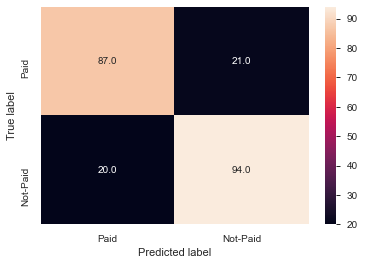

In [154]:
sn.heatmap(cm, annot=True,  fmt='.1f', xticklabels = ["Paid", "Not-Paid"] , yticklabels = ["Paid", "Not-Paid"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [155]:
roc_like_df = pd.DataFrame()
train_temp = train_pf.copy()

for cut_off in np.linspace(0,1,1000):
    
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

roc_like_df['senstivity+specificity'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df

,cutoff,sensitivity,specificity,accuracy,senstivity+specificity
0,0.000000,1.000000,0.0,0.486486,1.000000
0,0.001001,1.000000,0.0,0.486486,1.000000
0,0.002002,1.000000,0.0,0.486486,1.000000
0,0.003003,1.000000,0.0,0.486486,1.000000
0,0.004004,1.000000,0.0,0.486486,1.000000
...,...,...,...,...,...
0,0.995996,0.009259,1.0,0.518018,1.009259
0,0.996997,0.009259,1.0,0.518018,1.009259
0,0.997998,0.000000,1.0,0.513514,1.000000
0,0.998999,0.000000,1.0,0.513514,1.000000


In [157]:
roc_like_df[roc_like_df['senstivity+specificity'] == roc_like_df['senstivity+specificity'].max()]

,cutoff,sensitivity,specificity,accuracy,senstivity+specificity
0,0.586587,0.722222,0.938596,0.833333,1.660819
0,0.587588,0.722222,0.938596,0.833333,1.660819
0,0.588589,0.722222,0.938596,0.833333,1.660819
0,0.589590,0.722222,0.938596,0.833333,1.660819
0,0.590591,0.722222,0.938596,0.833333,1.660819
0,0.591592,0.722222,0.938596,0.833333,1.660819
0,0.592593,0.722222,0.938596,0.833333,1.660819
0,0.593594,0.722222,0.938596,0.833333,1.660819
0,0.594595,0.722222,0.938596,0.833333,1.660819
0,0.595596,0.722222,0.938596,0.833333,1.660819


In [158]:
test_pf['predicted'] = test_pf['prob'].apply(lambda x: 1 if x > 0.597598 else 0)
train_pf['predicted'] = train_pf['prob'].apply(lambda x: 1 if x > 0.597598 else 0)

In [159]:
pd.crosstab(train_pf['actual'], train_pf['predicted'])

predicted,0,1
actual,,
0,107,7
1,30,78


In [160]:
pd.crosstab(test_pf['actual'], test_pf['predicted'])

predicted,0,1
actual,,
0,43,2
1,11,40


In [161]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_pf.actual, train_pf.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_pf.actual, test_pf.predicted))

The overall accuracy score for the Train Data is :  0.8333333333333334
The overall accuracy score for the Test Data  is :  0.8645833333333334
